In [1]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [2]:
XCr_path

'/sdf/group/ad/beamphysics/fft-bpm/CrystalBPM_11_21_2025P/examples/../'

In [3]:
xcr = XCrystal(XCr_path+'/config/Si44417keVConstanStrainGradient.yaml')
xcr.convr
xcr.omega0


17000.0

In [4]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/Si44417keVConstanStrainGradient.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

def single_realization_with_data(delta_theta,omega):
    
    xcr = XCrystal(XCr_path+'/config/Si44417keVConstanStrainGradient.yaml')
    xcr.configure(delta_theta,0)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [5]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(-22e-6,17000.0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Beam propagation progress: 100%|██████████| 1260/1260 [00:02<00:00, 421.46it/s]

Photon energy (omega):  17000.0 ; Reflectivity:  0.38666424638018804 ; Transmission:  0.15809281528590158


In [6]:
kmax=U1_xyz.shape[3]
kmax
xcr.separation1

0

In [7]:
logh1=((xcr.Xx-xcr.separation1) >= (-xcr.HH )) * ((xcr.Xx-xcr.separation1) <=(xcr.HH ))
logh2=((xcr.Xx-xcr.separation1) >= (-xcr.HH*0.9 )) * ((xcr.Xx-xcr.separation1) <=(xcr.HH*0.9 ))
logh1h2_x=logh1^logh2
logh1h2=logh1h2_x
logh1h2.shape

(3200, 1)

In [8]:
log_hJ=np.zeros((xcr.xgrid,kmax))      
for i in range(xcr.xgrid):
    for k in range(kmax):
        log_hJ[i,k]=logh1h2[i,0]

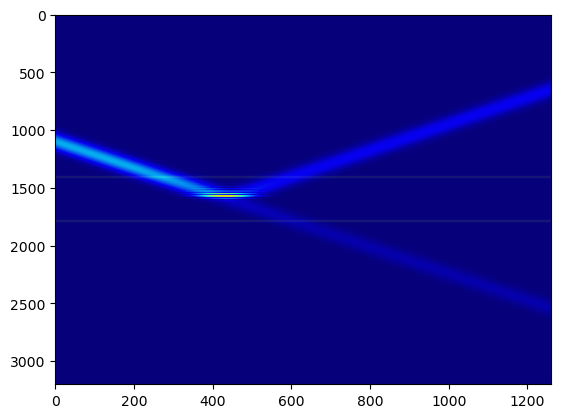

In [9]:
plt.imshow(np.abs(U1_xyz[0,:,0,:] + U2_xyz[0,:,0,:])**2, aspect='auto',cmap='jet')
plt.imshow(log_hJ, aspect='auto', alpha=0.1)